<a href="https://colab.research.google.com/github/prateekjoshi565/Community_Detection/blob/master/Untitled41.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [269]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

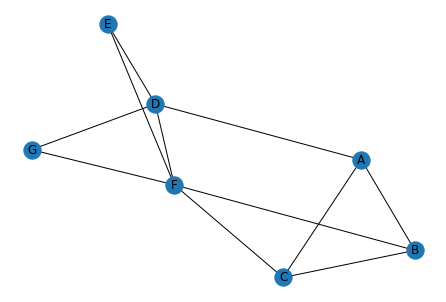

In [270]:
# load the graph
#G = nx.karate_club_graph()
G = nx.Graph()
G.add_nodes_from(['A','B','C','D','E','F','G'])
G.add_weighted_edges_from([('A','B',0.2), ('A','C',0.1), ('A','D',0.2)])
G.add_weighted_edges_from([('B','C',0.2),('B','F',0.1)])
G.add_weighted_edges_from([('C','F',0.2)])
G.add_weighted_edges_from([('D','E',0.3), ('D','F',0.2), ('D','G',0.4)])
G.add_weighted_edges_from([('E','F',0.1)])
G.add_weighted_edges_from([('F','G',0.3)])
nx.draw(G, with_labels = True)

# for n, nbrs in G.adj.items():
#     for nbr, eattr in nbrs.items():
#         wt = eattr['weight']
#         if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

In [271]:
len(G.nodes), len(G.edges)

(7, 11)

In [272]:
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()
  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

In [273]:
def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
    
	sg_count = nx.number_connected_components(graph)
	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

In [274]:
# find communities in the graph
c = girvan_newman(G.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))

In [275]:
node_groups

[['A', 'C', 'B'], ['G', 'E', 'F', 'D']]

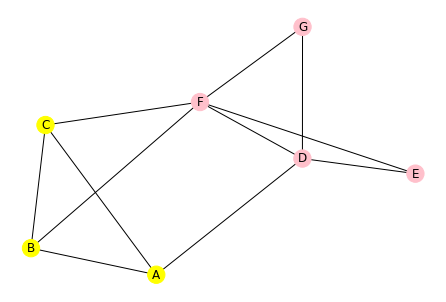

In [276]:
# plot the communities
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('yellow')
    else: 
        color_map.append('pink')  

nx.draw(G, node_color=color_map, with_labels=True)
plt.show()